In [1]:
from fast_interp import interp2d, interp1d
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline


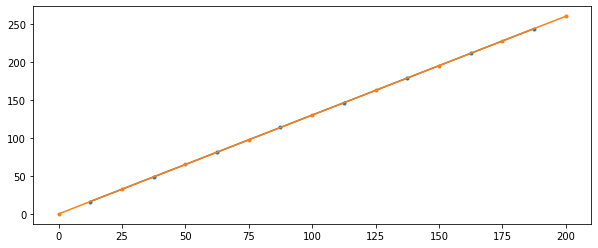

In [2]:
# Extrapolating grid positions from cell-center positions

dx = 25.0
L = 200.
x  = np.arange(0, L, dx) + dx / 2.0

f = 1.3*x + 0.2

fn = interp1d(x.min(), x.max(), dx, f, e=1, k=1)

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x, f, marker='.')
x_ = np.arange(0.0, L+dx, dx)
ax.plot(x_, fn(x_), marker='.')

## Extrapolating grid positions from cell-center positions with indecies

dx = 25.0
L = 200.
x  = np.arange(0, 200.0, dx) + dx / 2.0
N = len(x)
i = np.arange(0, N)

f = 1.3*x + 0.2

fn = interp1d(0, N, 1, f, e=0, k=1)
fn_e = interp1d(0, N, 1, f, e=1, k=1)


fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(i, f, marker='s', label="data")
i_ = np.arange(0, N+1, 0.5) - 0.5
ax.plot(i_, fn(i_), marker='.', label="no extrapolation")
ax.plot(i_, fn_e(i_), marker='.', label="with extrapolation")
ax.legend()

i_

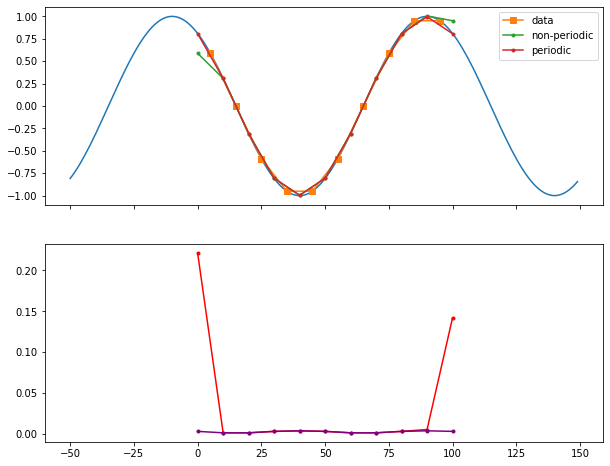

In [4]:
# Extrapolating data values from cell-center values with indecies

interp_order = 3

dx = 10.0
L = 100.
px = L / 10.0
x  = np.arange(0, L, dx) + dx / 2.0
N = len(x)
i = np.arange(0, N)

tau = 2.0 * np.pi / L

f = lambda x_: np.cos((x_ + px) * tau)

dx_ = dx / 10.0
x2 = np.arange(-L/2., L+L/2., dx_)

fn = interp1d(x.min(), x.max(), dx, f(x), k=interp_order, p=False)
fn_p = interp1d(x.min(), x.max(), dx, f(x), k=interp_order, p=True)

fig, axes = plt.subplots(nrows=2, figsize=(10, 8), sharex=True)

ax = axes[0]
ax.plot(x2, f(x2))
ax.plot(x, f(x), marker='s', label="data")

x_ = np.arange(0.0, L+dx, dx)
ax.plot(x_, fn(x_), marker='.', label="non-periodic")
ax.plot(x_, fn_p(x_), marker='.', label="periodic")

ax.legend()

ax = axes[1]
ax.plot(x_, np.abs(fn(x_)-f(x_)), marker='.', color="red")
ax.plot(x_, np.abs(fn_p(x_)-f(x_)), marker='.', color="purple")